Importing the required libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (20,12)
plt.rcParams['font.size'] = 12

Reading and showing the data

In [2]:
house = pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Visualizing the null values in the dataframe

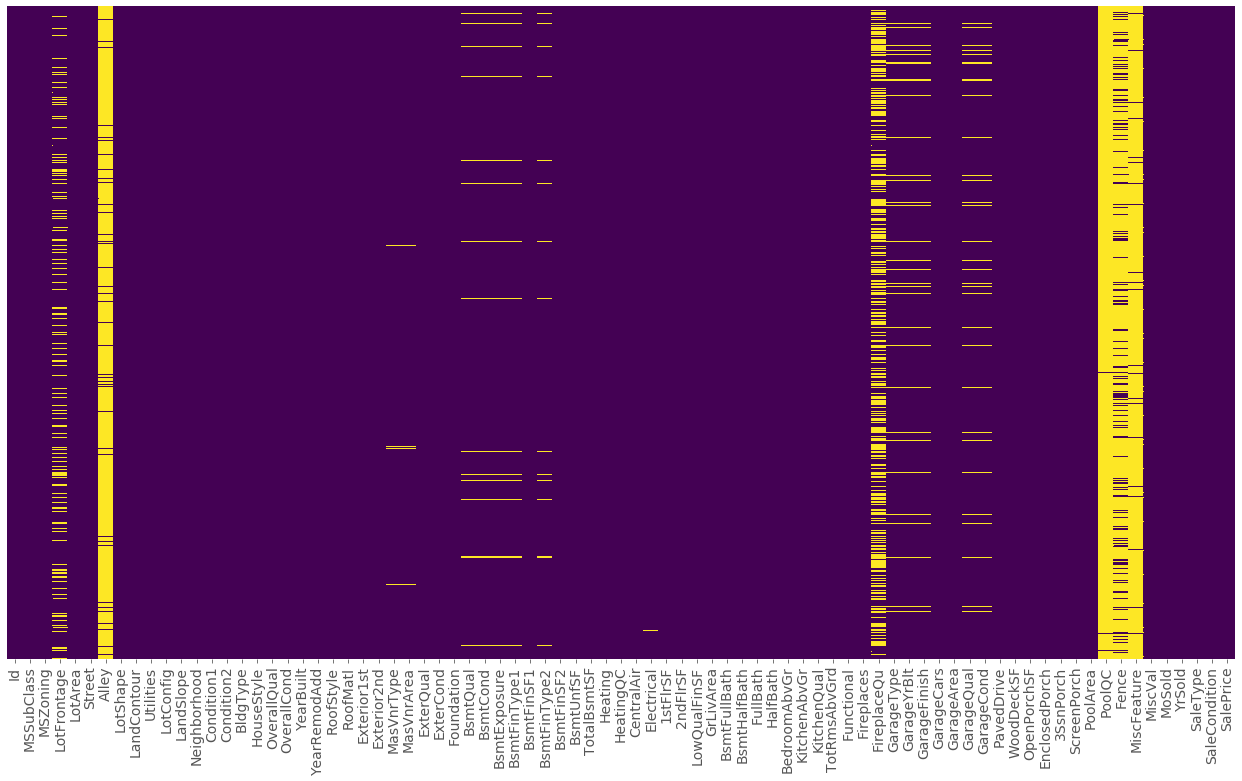

In [43]:
sns.heatmap(house.isnull(),cmap='viridis', cbar=False).set(yticks=[]);

Percentage of null values in selected columns (from the plot above)

In [18]:
house[['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']].isna().sum()*100/house.shape[0]

Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

The dataframe is cleared from mostly empty columns

In [3]:
house = house.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

The dataframe is shown again without some columns, it can be seen that it still has some null values, however this are not many and will not affect the posterior handling of the data (or will make it easier to handle)

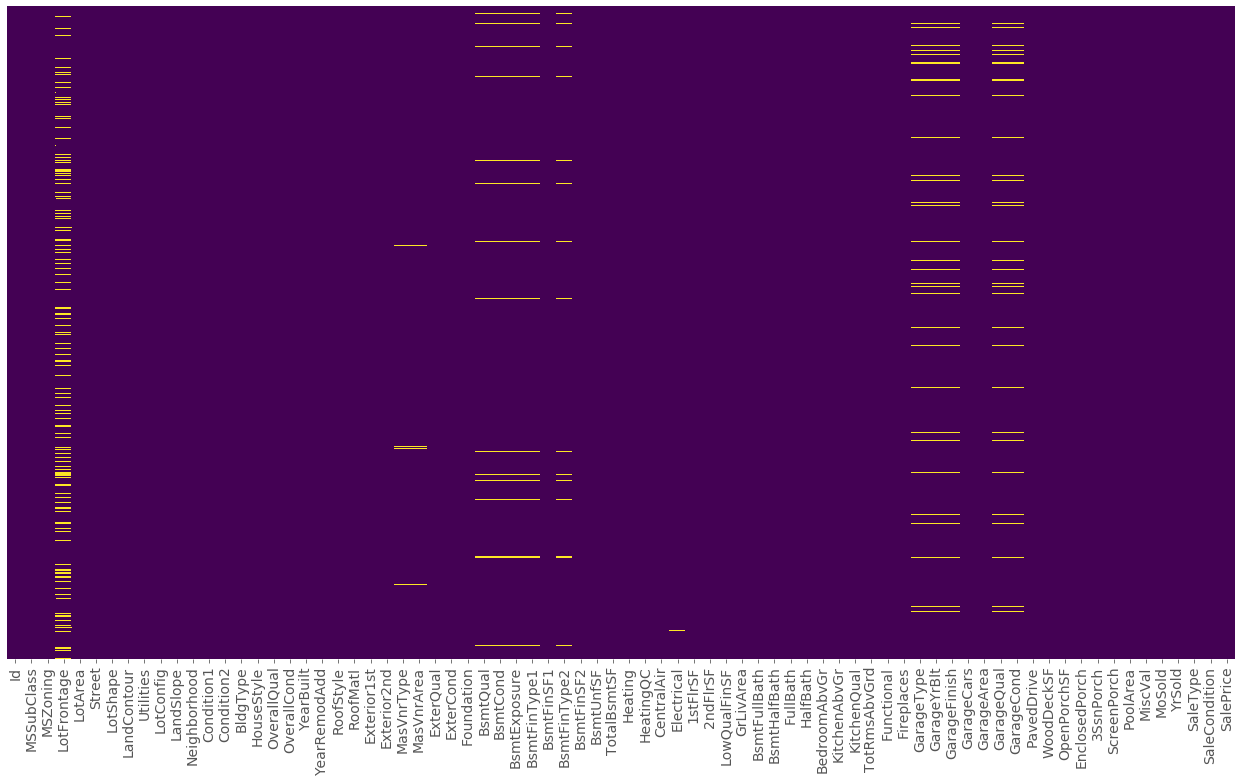

In [51]:
sns.heatmap(house.isnull(),cmap='viridis', cbar=False).set(yticks=[]);

The types of data contain are shown and counted by column

In [7]:
house.dtypes.value_counts()

object     38
int64      35
float64     3
dtype: int64

The correlation matrix is plotted **only for numerical variables**

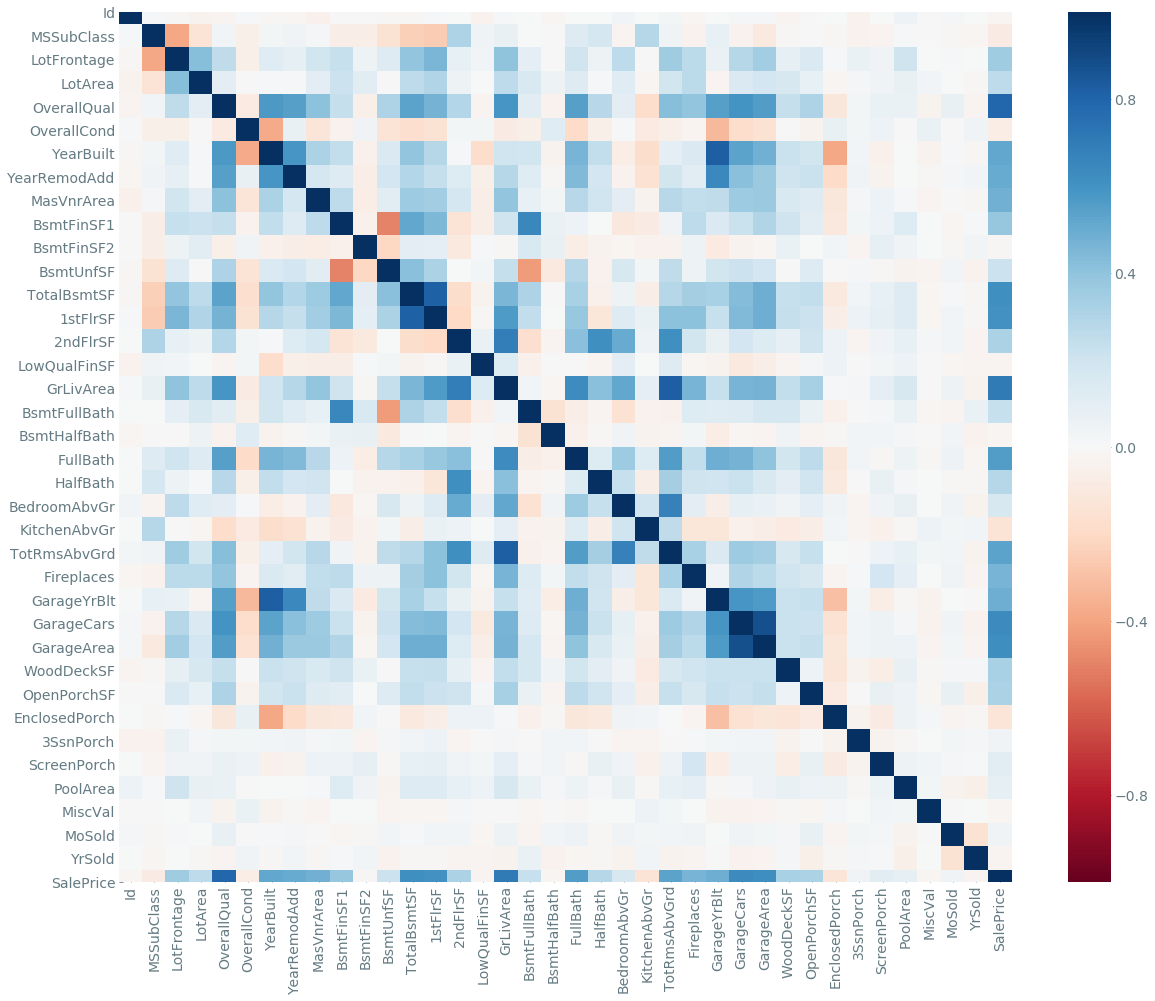

In [112]:
plt.figure(figsize=(20,16))
sns.heatmap(house.corr(), cmap='RdBu', vmin=-1, vmax=1);

Correlation coefficients are sorted to see wich variables are more correlated to *SalePrice*

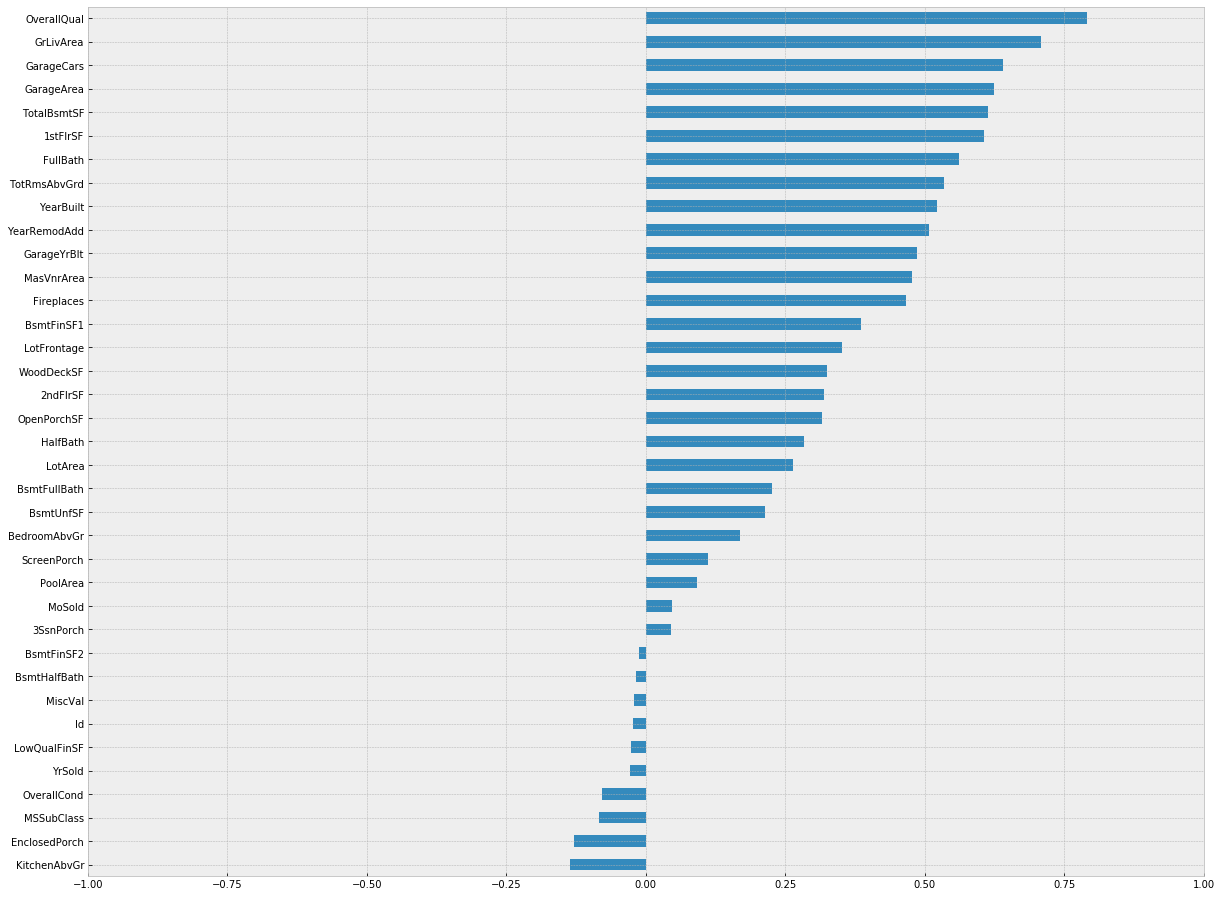

In [4]:
plt.figure(figsize=(20,16))
house.corr()['SalePrice'][:-1].sort_values().plot(kind='barh').set_xlim(-1,1);

To see the relationship between each **numerical variable** and *SalePrice*, a plot is made for each of these relationships

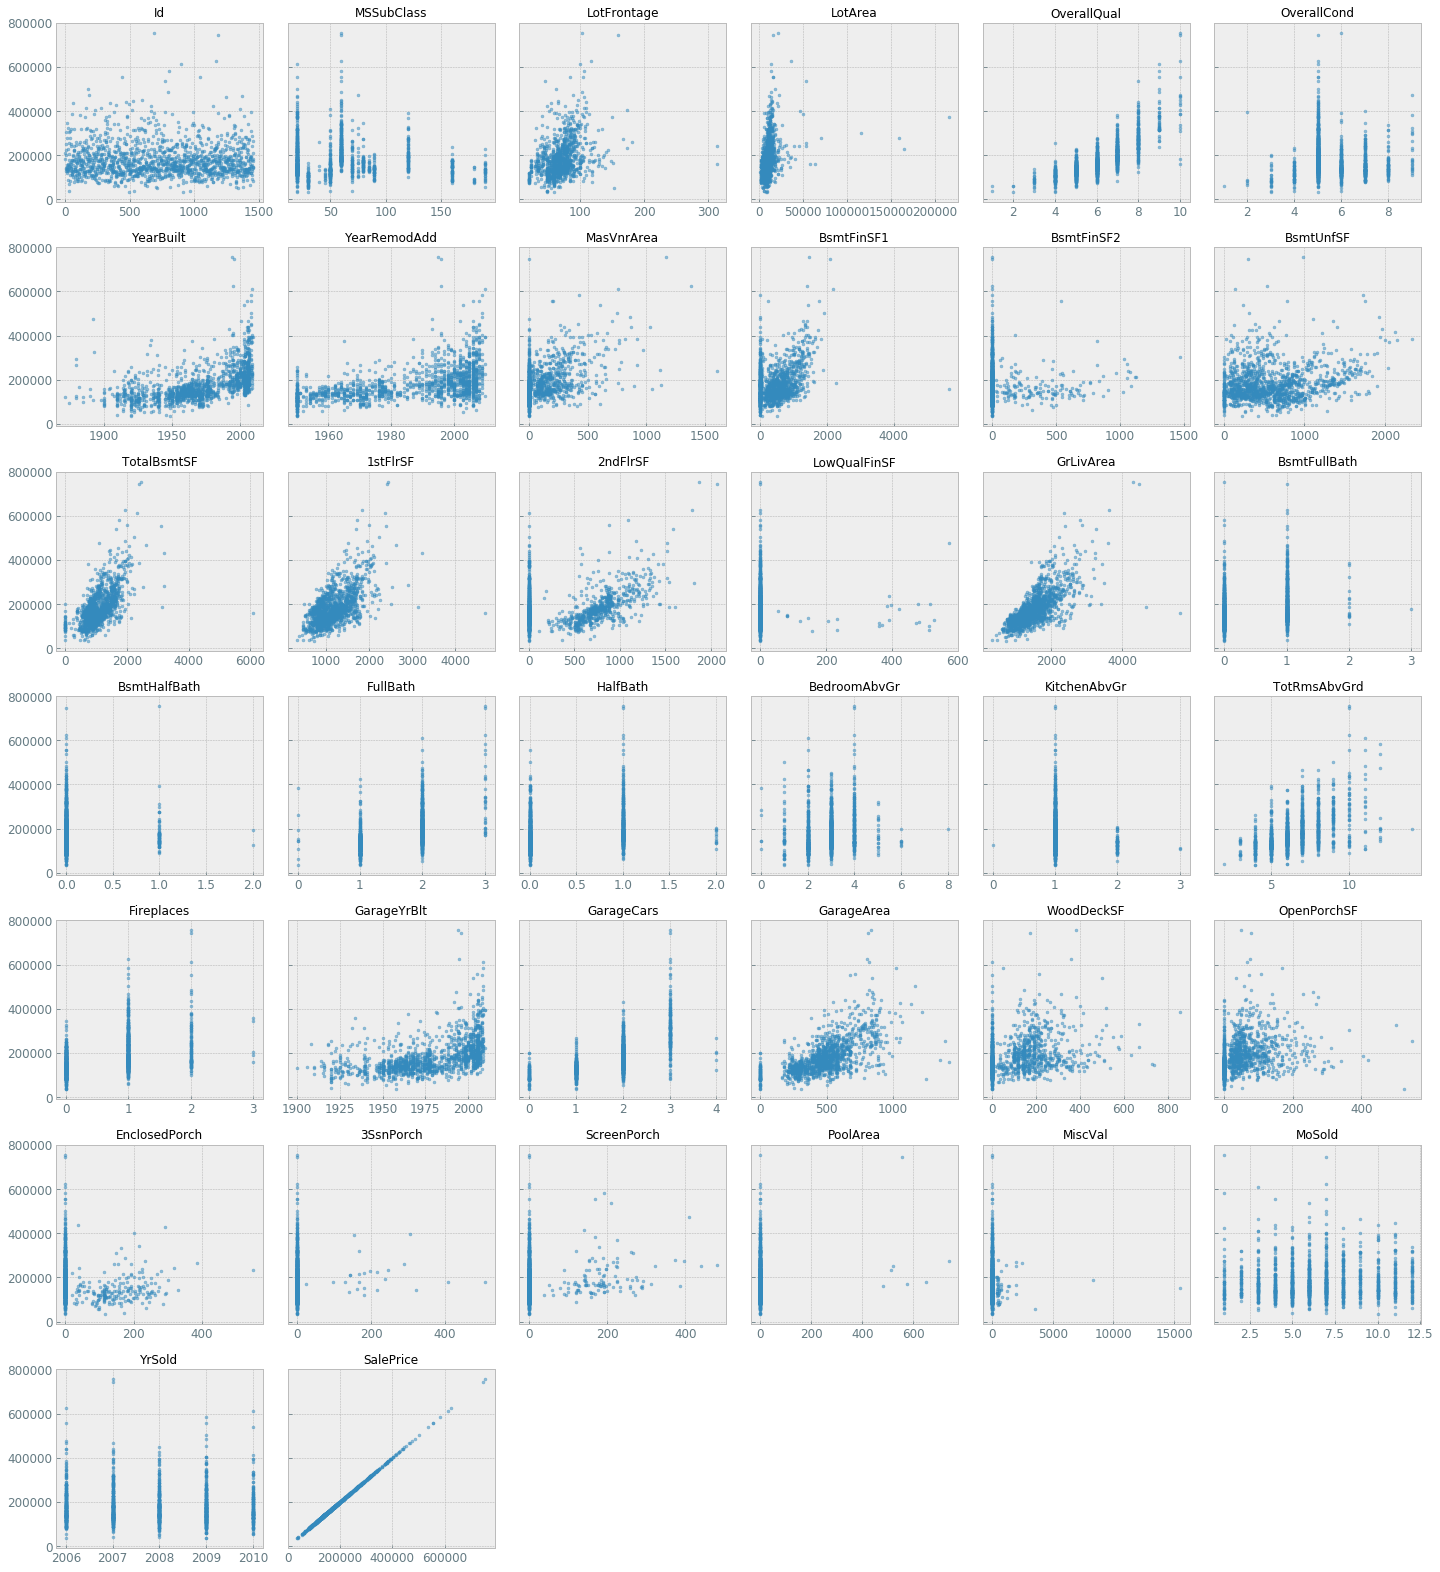

In [205]:
fig, axes = plt.subplots(7,6, figsize=(20,22), sharey=True)

num_names = house.select_dtypes(include='number').columns
p = 0

for i in range(7):
    for j in range(6):
        if p < 38:
            axes[i][j].scatter(house[num_names[p]], house['SalePrice'], marker='.', alpha=0.5)
            axes[i][j].set_title(num_names[p], fontsize=12)
            p += 1
        else:
            fig.delaxes(axes[i][j])
            
plt.tight_layout()

The dataframe also contains **categorical variables**, in order to appropriately see this relationships, each one is plotted in the form of boxplot 

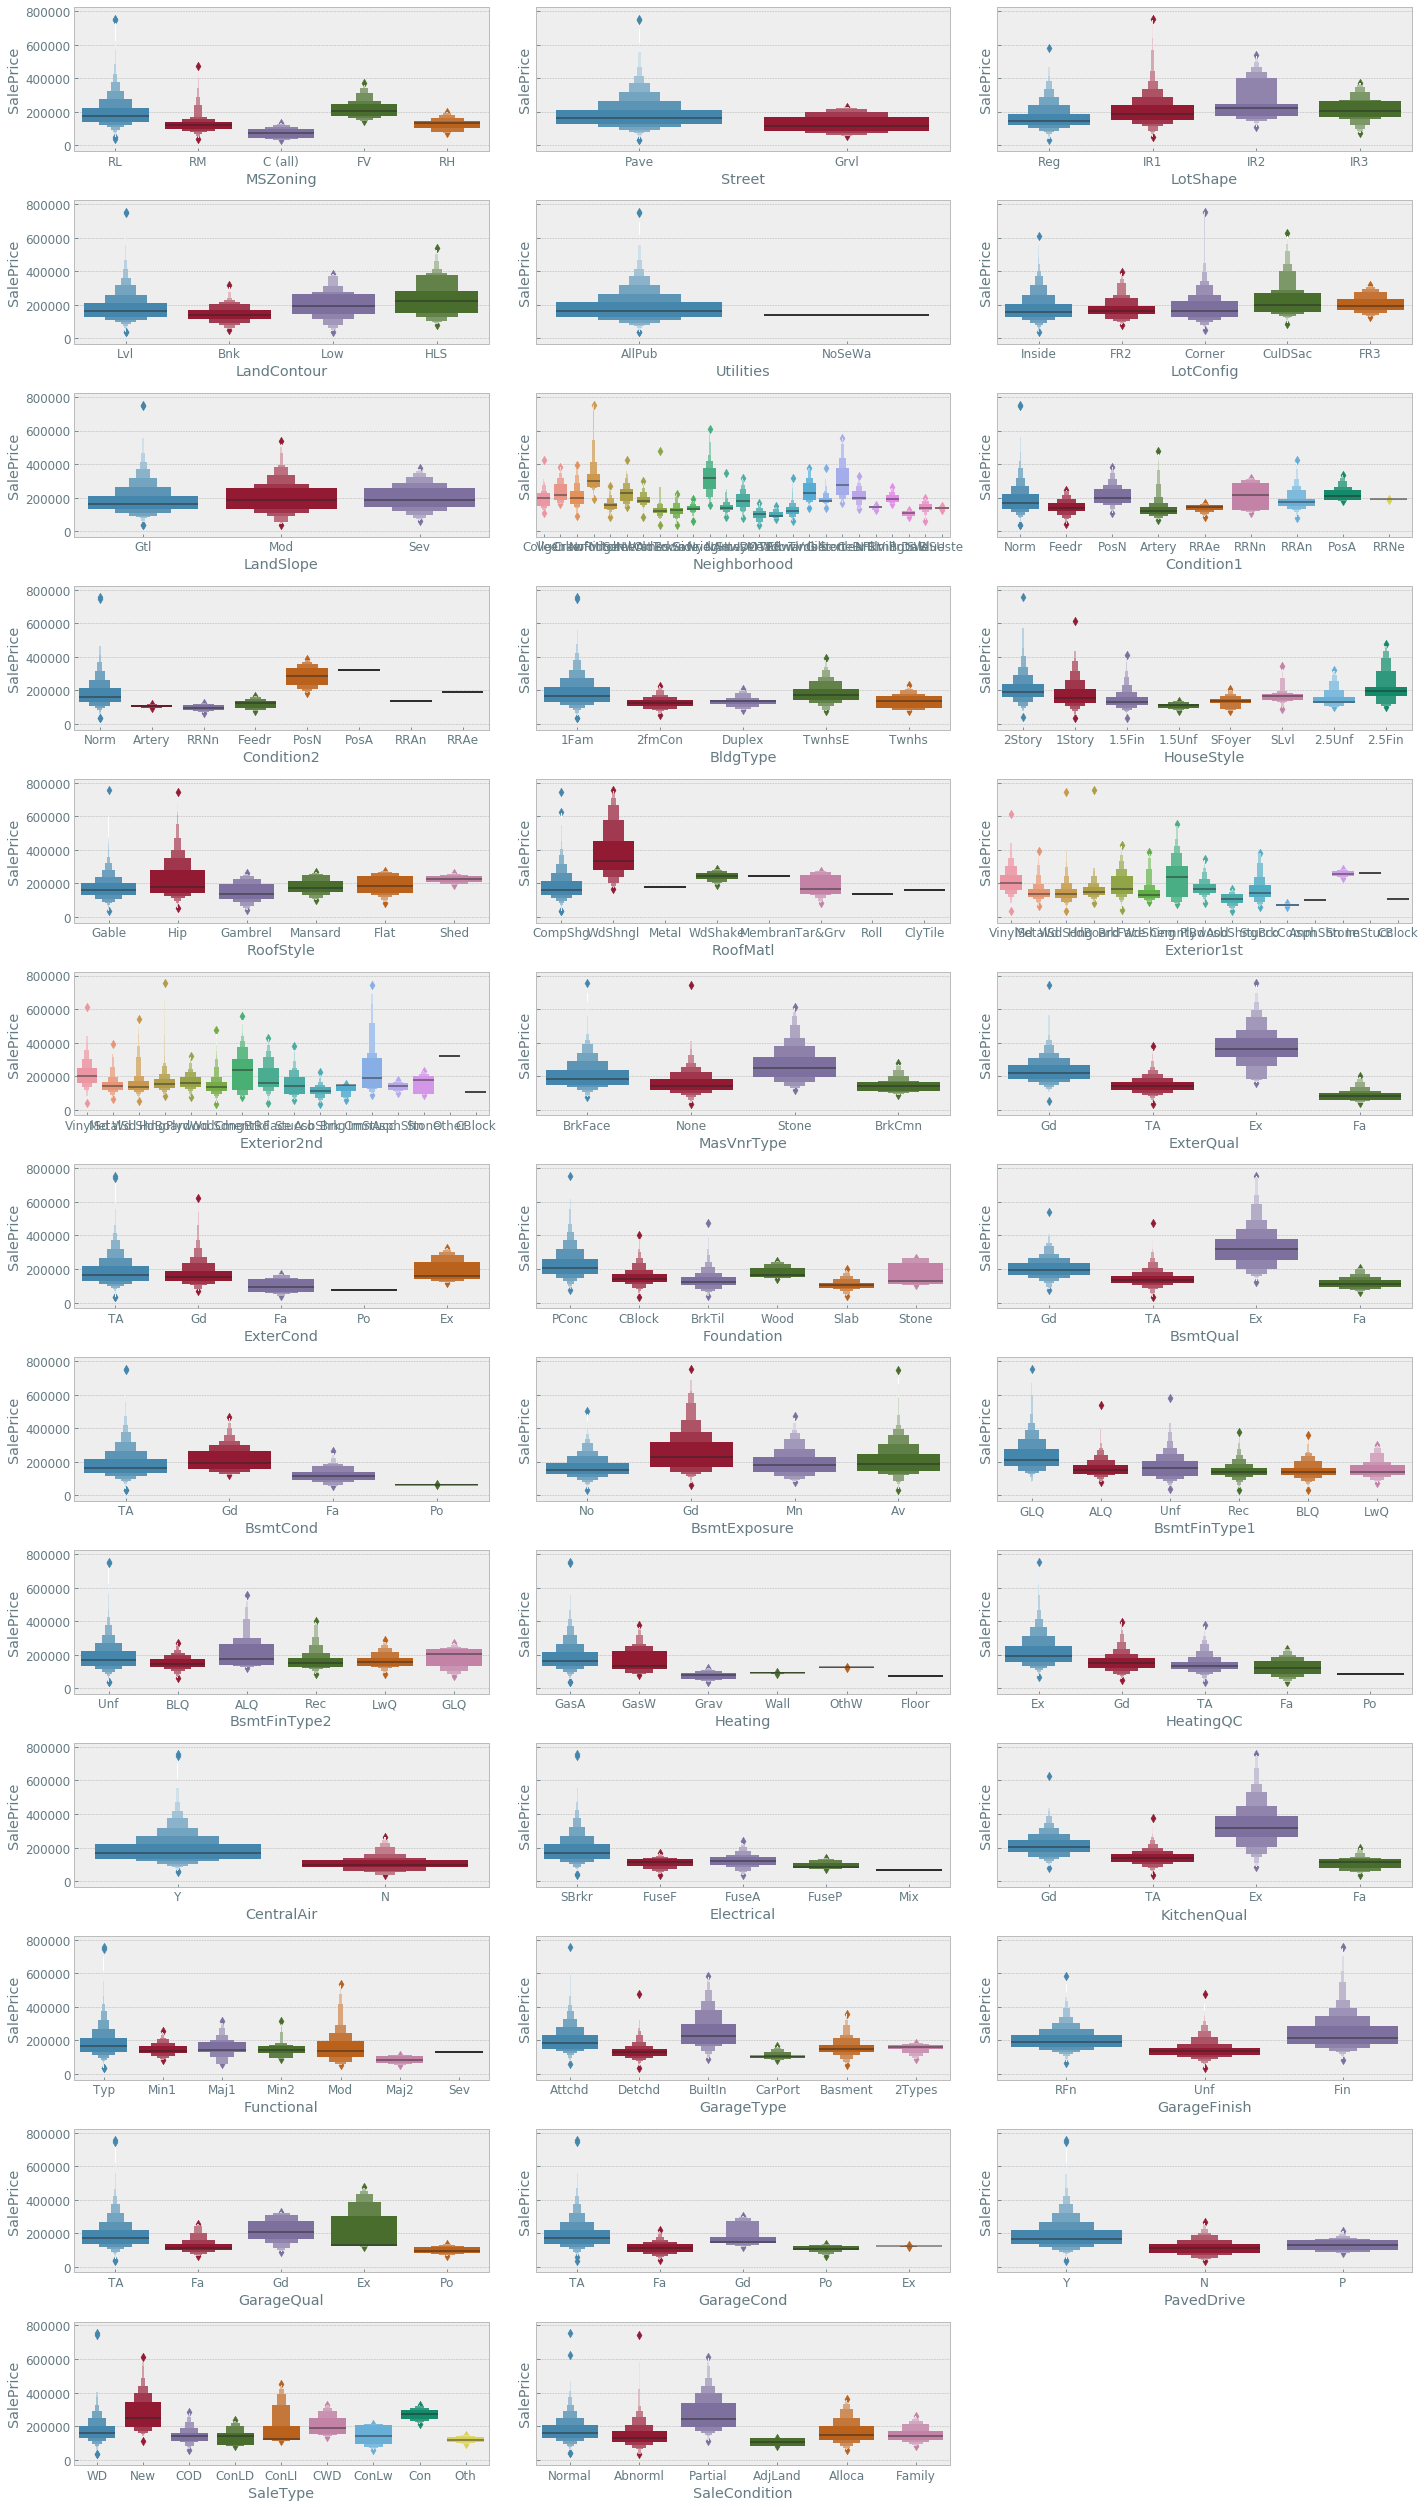

In [267]:
fig, axes = plt.subplots(13,3, figsize=(20,35), sharey=True)

cat_names = house.select_dtypes(exclude='number').columns
p = 0

for i in range(13):
    for j in range(3):
        if p < 38:
            sns.boxenplot(x=cat_names[p], y=house['SalePrice'], data=house, ax=axes[i,j])
            p += 1
        else:
            fig.delaxes(axes[i][j])

plt.tight_layout()

Selecting columns whose correlation values with SalePrice are higher than 0.5

In [30]:
sv = house.corr()['SalePrice'][:-1].sort_values()[house.corr()['SalePrice'][:-1].sort_values()>0.5]

A model is made with the columns selected above

In [21]:
X = sm.add_constant(house[sv.index.tolist()])
Y = house.SalePrice

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        10:52:04   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187   

/home/xhoan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The model is plotted below

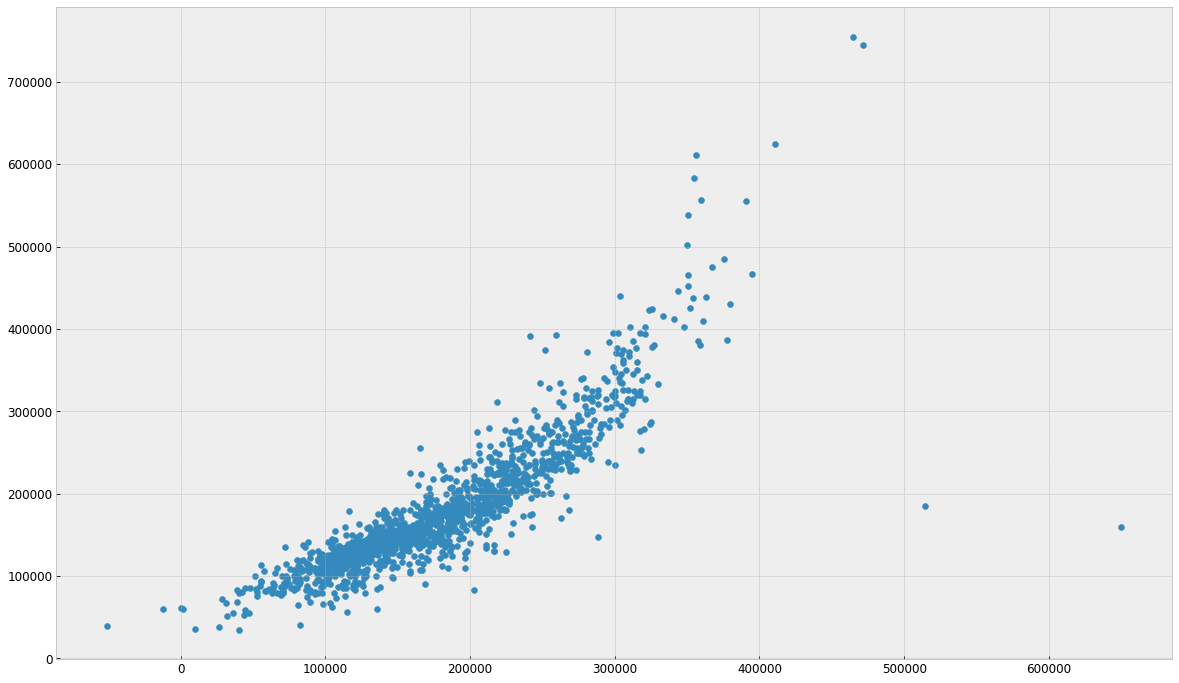

In [29]:
plt.scatter(predictions, Y);